In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
!pip install tensorflow

In [4]:
!pip install keras

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os
os.chdir('C:/Users/Sandhu/Desktop/Data Sets')

In [7]:
#Laod the dataset
df = pd.read_csv('concrete.csv')

In [8]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
#Data understanding
print(df.shape)
print('\n-------------------------------------------------\n')
print(df.info())
print('\n-------------------------------------------------\n')
df.describe()

(1030, 9)

-------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None

-------------------------------------------------



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Exploratory Data Analysis

# Univariate Analysis

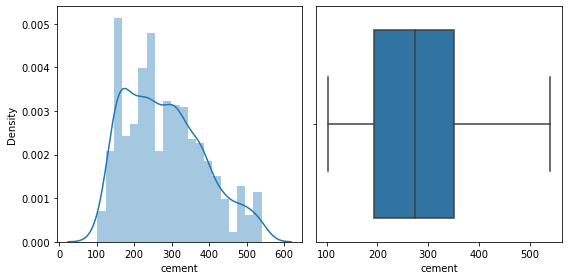

In [10]:

plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(df.cement,bins=20,norm_hist=True)
plt.subplot(122)
sns.boxplot(df.cement,orient='v')
plt.tight_layout()
plt.show()

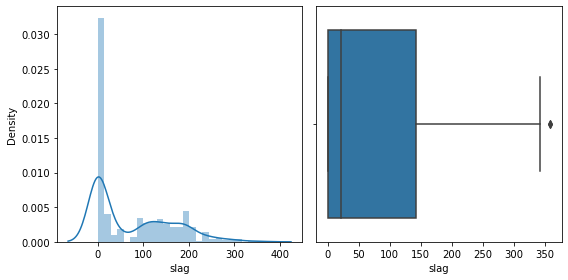

In [11]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(df.slag,bins=25,norm_hist=True)
plt.subplot(122)
sns.boxplot(df.slag,orient='v')
plt.tight_layout()
plt.show()

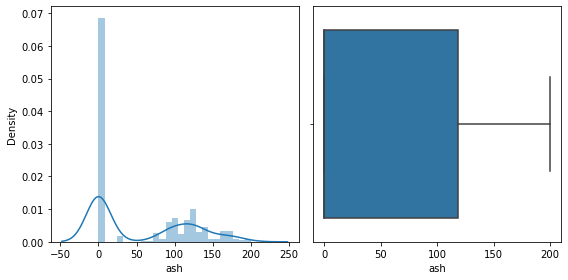

In [12]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(df.ash,bins=25,norm_hist=True)
plt.subplot(122)
sns.boxplot(df.ash,orient='v')
plt.tight_layout()
plt.show()

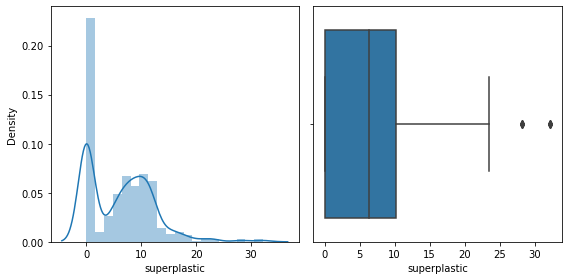

In [13]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(df.superplastic,bins=20,norm_hist=True)
plt.subplot(122)
sns.boxplot(df.superplastic,orient='v')
plt.tight_layout()
plt.show()

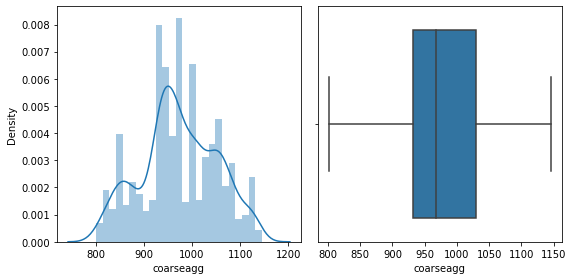

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(df.coarseagg,bins=25,norm_hist=True)
plt.subplot(122)
sns.boxplot(df.coarseagg,orient='v')
plt.tight_layout()
plt.show()

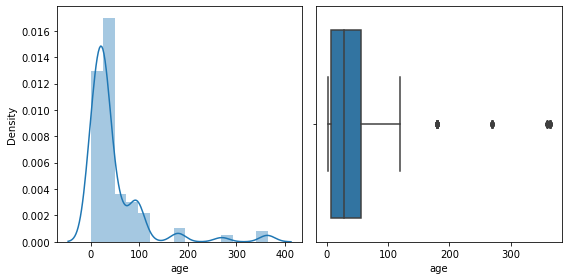

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(df.age,bins=15,norm_hist=True)
plt.subplot(122)
sns.boxplot(df.age,orient='v')
plt.tight_layout()
plt.show()

# Bivariate Analysis

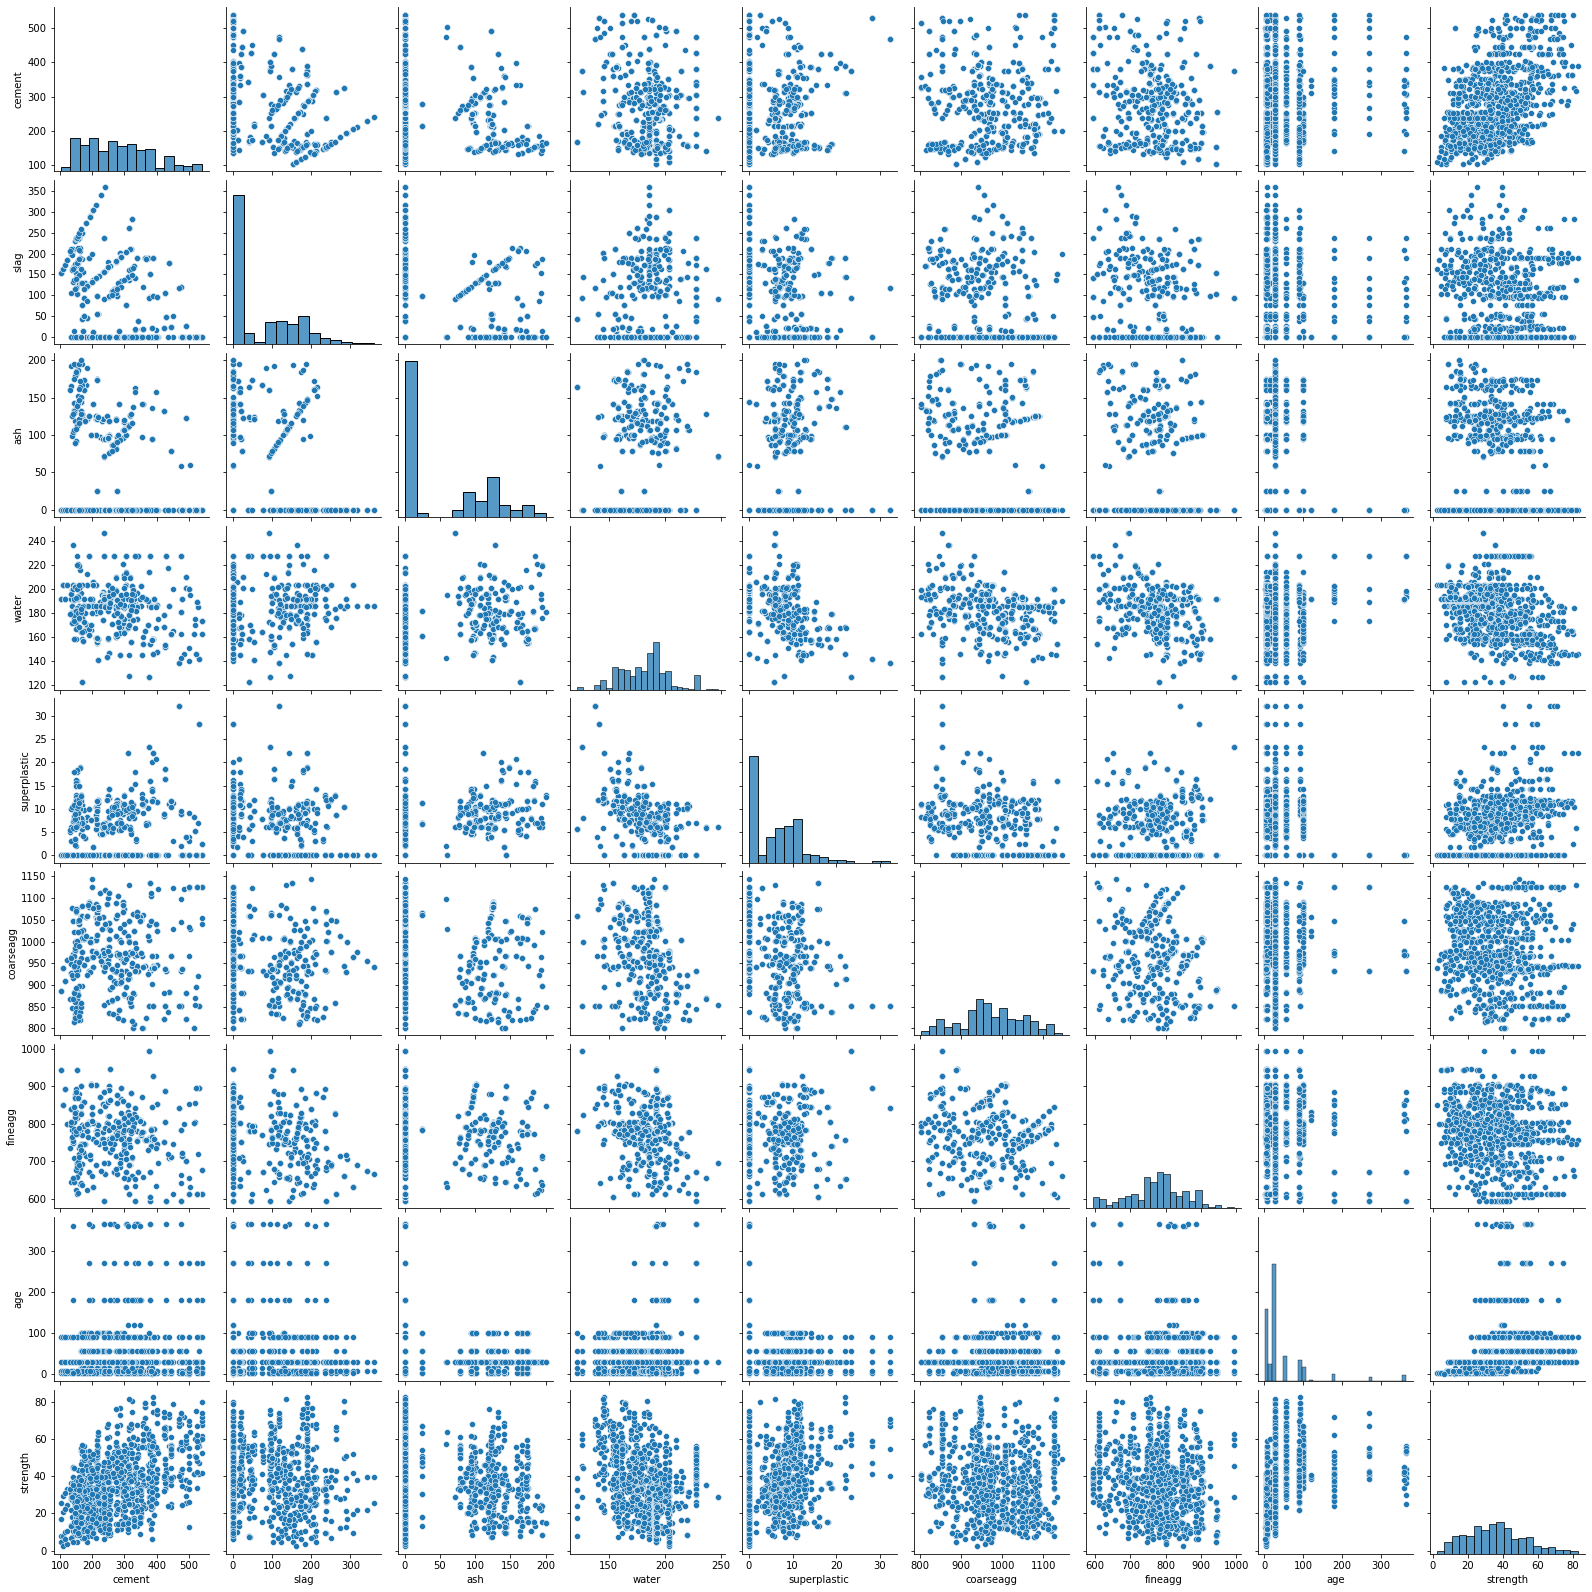

In [16]:
sns.pairplot(df.select_dtypes(exclude=object))

# Observations
1. Cement is linearly associated with concrete strength
2. There is no linear association of variables i.e. slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age with strength

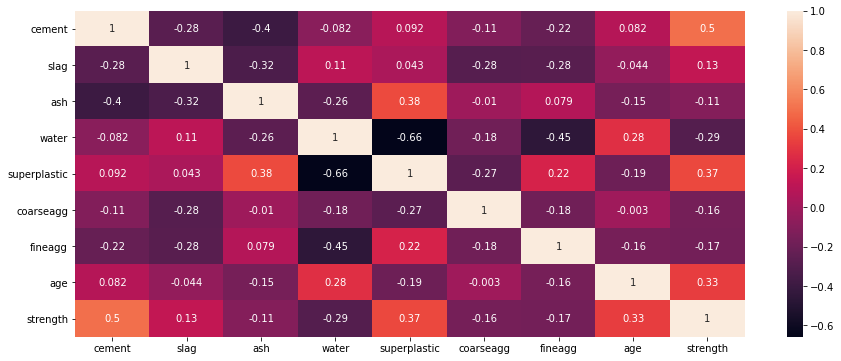

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
# creating data frame of independent variables
X = df.iloc[:,0:-1]
# creating dependent variables
y = df.iloc[:,-1]

In [19]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [20]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

In [21]:
#split the data into Trainingset and Testset
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70,random_state=100)

In [22]:
from sklearn.preprocessing import StandardScaler
# instantiate scaler object
scaler = StandardScaler()

In [23]:
# applying standard scaler to training data
X_train[['cement','slag','ash','water','superplastic','coarseagg',
         'age']] = scaler.fit_transform(X_train[['cement','slag','ash','water','superplastic',
                                                 'coarseagg','age']])

In [24]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
282,-0.314419,-0.830768,1.034153,0.290468,0.050122,0.715494,757.7,0.140684
599,0.515498,-0.830768,-0.828687,0.694741,-1.001648,-0.064947,781.0,-0.615015
252,-0.327683,-0.830768,0.678276,0.238151,-0.097783,-0.208372,861.2,0.140684
193,-0.481161,-0.830768,0.660955,0.737546,-0.245688,-0.336292,852.2,0.819271
644,0.619712,-0.830768,-0.828687,0.171564,-1.001648,0.994593,770.0,-0.291144
...,...,...,...,...,...,...,...,...
802,0.515498,-0.830768,-0.828687,0.124003,-1.001648,1.123805,754.0,-0.291144
53,0.183910,0.044500,-0.828687,2.169148,-1.001648,-0.530110,670.0,0.665047
350,-0.673482,-0.830768,1.914396,-1.321867,0.921119,1.024311,775.5,-0.507058
79,2.337339,-0.830768,-0.828687,-1.930654,3.632714,-1.562515,893.7,-0.676705


In [25]:
# applying standard scaler to test data
X_test[['cement','slag','ash','water','superplastic','coarseagg',
         'age']] = scaler.fit_transform(X_test[['cement','slag','ash','water','superplastic',
                                                 'coarseagg','age']])

In [26]:
X_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
173,0.449811,1.588022,-0.891369,-1.090779,1.378308,-1.536556,880.4,0.818168
134,0.881753,1.310557,-0.891369,-0.671619,0.903604,-0.356436,755.8,-0.251782
822,0.481369,-0.920971,-0.891369,1.064254,-1.135863,0.016972,800.0,-0.251782
264,-0.603417,-0.920971,1.032117,-0.940428,0.235503,1.436685,799.5,-0.676365
479,1.704218,-0.637602,0.326222,-0.803745,0.903604,-0.072238,712.0,-0.608432
...,...,...,...,...,...,...,...,...
359,-0.542275,-0.276307,1.016705,-1.769638,0.956349,1.313065,792.7,-0.676365
12,1.521777,-0.360137,-0.891369,2.203278,-1.135863,-0.518288,594.0,3.858183
287,-0.905185,-0.920971,1.682527,-0.457482,0.200339,1.056905,777.8,0.223751
985,-0.176406,0.245563,0.295397,0.408176,0.006942,-0.683964,749.3,-0.251782


In [27]:
from keras import backend

In [28]:
#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Building Artificial Neural Network

In [29]:
# instantiate Sequential object
classifier = Sequential()

In [30]:
# First layer of ANN
classifier.add(Dense(128,activation='relu',kernel_initializer='uniform',input_dim=8))
Dropout(rate=0.01)

In [31]:
# second layer of ANN 
classifier.add(Dense(64,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [32]:
# Third layer of ANN
classifier.add(Dense(32,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [33]:
# Fourth layer of ANN
classifier.add(Dense(16,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [34]:
# Output layer
classifier.add(Dense(1,activation='linear',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [35]:
# compiling ANN
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=[rmse])

In [36]:
# fitting the ANN
classifier.fit(X_train,y_train,batch_size=64,epochs=600)

Epoch 1/600
12/12 [==============================] - 34s 11ms/step - loss: 1525.5625 - rmse: 35.4551
Epoch 2/600
12/12 [==============================] - 0s 8ms/step - loss: 1541.9141 - rmse: 35.6102
Epoch 3/600
12/12 [==============================] - 0s 11ms/step - loss: 1132.3223 - rmse: 29.5712
Epoch 4/600
12/12 [==============================] - 0s 7ms/step - loss: 422.7763 - rmse: 16.7248
Epoch 5/600
12/12 [==============================] - 0s 7ms/step - loss: 328.8271 - rmse: 14.7593
Epoch 6/600
12/12 [==============================] - 0s 8ms/step - loss: 305.4987 - rmse: 14.0188
Epoch 7/600
12/12 [==============================] - 0s 9ms/step - loss: 303.1346 - rmse: 14.1536
Epoch 8/600
12/12 [==============================] - 0s 7ms/step - loss: 300.3282 - rmse: 14.0612
Epoch 9/600
12/12 [==============================] - 0s 8ms/step - loss: 304.6041 - rmse: 14.1968
Epoch 10/600
12/12 [==============================] - 0s 8ms/step - loss: 297.5597 - rmse: 14.0037
Epoch 11/600


12/12 [==============================] - 0s 7ms/step - loss: 96.6756 - rmse: 7.3452
Epoch 165/600
12/12 [==============================] - 0s 7ms/step - loss: 101.3987 - rmse: 7.6913: 0s - loss: 100.8792 - rmse: 7.68
Epoch 166/600
12/12 [==============================] - 0s 7ms/step - loss: 105.4756 - rmse: 8.0626
Epoch 167/600
12/12 [==============================] - 0s 8ms/step - loss: 105.2706 - rmse: 7.9117
Epoch 168/600
12/12 [==============================] - 0s 8ms/step - loss: 95.8050 - rmse: 7.3788
Epoch 169/600
12/12 [==============================] - 0s 12ms/step - loss: 100.3416 - rmse: 7.6106
Epoch 170/600
12/12 [==============================] - 0s 7ms/step - loss: 97.2017 - rmse: 7.5037
Epoch 171/600
12/12 [==============================] - 0s 7ms/step - loss: 91.7197 - rmse: 7.1028
Epoch 172/600
12/12 [==============================] - 0s 8ms/step - loss: 102.3725 - rmse: 7.7119
Epoch 173/600
12/12 [==============================] - 0s 9ms/step - loss: 97.2940 - rmse: 7

Epoch 327/600
12/12 [==============================] - 0s 6ms/step - loss: 59.5271 - rmse: 6.0147
Epoch 328/600
12/12 [==============================] - 0s 8ms/step - loss: 66.2893 - rmse: 6.5419
Epoch 329/600
12/12 [==============================] - 0s 7ms/step - loss: 65.6650 - rmse: 6.4059
Epoch 330/600
12/12 [==============================] - 0s 7ms/step - loss: 53.9226 - rmse: 5.6042
Epoch 331/600
12/12 [==============================] - 0s 7ms/step - loss: 60.7863 - rmse: 6.1483
Epoch 332/600
12/12 [==============================] - 0s 7ms/step - loss: 59.4270 - rmse: 5.8617
Epoch 333/600
12/12 [==============================] - 0s 7ms/step - loss: 53.3940 - rmse: 5.7100
Epoch 334/600
12/12 [==============================] - 0s 7ms/step - loss: 51.4420 - rmse: 5.5801A: 0s - loss: 50.6039 - rmse: 5.547
Epoch 335/600
12/12 [==============================] - 0s 7ms/step - loss: 57.3007 - rmse: 5.8750
Epoch 336/600
12/12 [==============================] - 0s 7ms/step - loss: 55.7548 

12/12 [==============================] - 0s 7ms/step - loss: 47.9554 - rmse: 5.3745
Epoch 492/600
12/12 [==============================] - 0s 7ms/step - loss: 49.2461 - rmse: 5.5430
Epoch 493/600
12/12 [==============================] - 0s 7ms/step - loss: 45.3502 - rmse: 5.2042
Epoch 494/600
12/12 [==============================] - 0s 8ms/step - loss: 49.0159 - rmse: 5.3494
Epoch 495/600
12/12 [==============================] - 0s 8ms/step - loss: 48.1305 - rmse: 5.4066
Epoch 496/600
12/12 [==============================] - 0s 7ms/step - loss: 43.7067 - rmse: 5.1689
Epoch 497/600
12/12 [==============================] - 0s 7ms/step - loss: 61.0083 - rmse: 6.2088
Epoch 498/600
12/12 [==============================] - 0s 7ms/step - loss: 73.6437 - rmse: 6.6901
Epoch 499/600
12/12 [==============================] - 0s 7ms/step - loss: 47.1598 - rmse: 5.4980
Epoch 500/600
12/12 [==============================] - 0s 7ms/step - loss: 45.5518 - rmse: 5.2163
Epoch 501/600
12/12 [=============

In [37]:
# making predictions on the test set
y_pred = classifier.predict(X_test)
y_pred[0:5]

array([[71.549   ],
       [66.1662  ],
       [30.089855],
       [19.44651 ],
       [47.842407]], dtype=float32)

In [38]:
y_test

173    68.10
134    71.30
822    25.18
264    19.52
479    38.02
       ...  
359    27.42
12     43.01
287    35.57
985    33.80
698    41.68
Name: strength, Length: 309, dtype: float64

In [39]:
# computing R2 value
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.7826192819059132

In [40]:
# computing adjusted R2
adjusted_r2 = 1-((1-r2)*1029/(1030-8-1))
adjusted_r2

0.7809160049766746

In [41]:
#split the data into Trainingset and Testset
import sklearn
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,train_size = 0.80,random_state=100)

In [42]:
from sklearn.preprocessing import StandardScaler
# instantiate scaler object
scaler = StandardScaler()

In [43]:
# applying standard scaler to training data
X1_train[['cement','slag','ash','water','superplastic','coarseagg','fineagg',
         'age']] = scaler.fit_transform(X1_train[['cement','slag','ash','water','superplastic',
                                                 'coarseagg','fineagg','age']])

In [44]:
X1_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
337,-0.081888,-0.839676,1.065034,-1.053442,0.618037,1.041481,0.068140,0.162580
384,2.213937,-0.839676,-0.838172,-0.935631,0.336283,-2.235919,0.376619,-0.281962
805,1.041723,-0.839676,-0.838172,0.478101,-1.022767,-0.432440,-0.177385,0.702381
682,-0.951042,0.580076,-0.838172,1.020031,-1.022767,-0.183327,0.351437,-0.281962
329,-0.351593,-0.839676,1.123039,-1.816857,0.966086,1.472240,0.362769,-0.678874
...,...,...,...,...,...,...,...,...
802,0.527092,-0.839676,-0.838172,0.148230,-1.022767,1.124519,-0.227749,-0.281962
53,0.193535,0.040431,-0.838172,2.174579,-1.022767,-0.536238,-1.285393,0.702381
350,-0.668948,-0.839676,1.892788,-1.284351,0.916365,1.024614,0.042958,-0.504233
79,2.359749,-0.839676,-0.838172,-1.887543,3.651038,-1.572913,1.531214,-0.678874


In [45]:
# applying standard scaler to test data
X1_test[['cement','slag','ash','water','superplastic','coarseagg','fineagg',
         'age']] = scaler.fit_transform(X1_test[['cement','slag','ash','water','superplastic',
                                                 'coarseagg','fineagg','age']])

In [46]:
X1_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
173,0.468340,1.555320,-0.883711,-1.134253,1.393838,-1.485704,1.219955,0.717347
134,0.898112,1.280622,-0.883711,-0.712093,0.921094,-0.331311,-0.287290,-0.270947
822,0.499739,-0.928650,-0.883711,1.036198,-1.109954,0.033956,0.247383,-0.270947
264,-0.579598,-0.928650,1.048320,-0.982826,0.255751,1.422718,0.241334,-0.663127
479,1.716446,-0.648108,0.339290,-0.845166,0.921094,-0.053309,-0.817124,-0.600379
...,...,...,...,...,...,...,...,...
247,-0.323501,-0.928650,0.573053,0.288241,0.115679,-0.266485,0.815926,0.168295
207,-0.578617,-0.928650,0.998781,-0.005435,-0.111939,1.076151,-0.003018,0.168295
672,-0.962273,0.427305,-0.883711,0.531442,-1.109954,-0.305131,0.934473,-0.663127
191,-0.365693,-0.928650,0.580794,0.802174,-0.304538,-0.302638,0.878829,-0.270947


In [47]:
#Defining Root Mean Square Error As our Metric Function 
def rmse(y1_true, y1_pred):
    return backend.sqrt(backend.mean(backend.square(y1_pred - y1_true), axis=-1))

In [48]:
classifier = Sequential()

In [49]:
classifier.add(Dense(128,activation='relu',kernel_initializer='uniform',input_dim=8))
Dropout(rate=0.01)

In [50]:
classifier.add(Dense(64,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [51]:
classifier.add(Dense(32,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [52]:
# Fourth layer of ANN
classifier.add(Dense(16,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [53]:
# Output layer
classifier.add(Dense(1,activation='linear',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [54]:
# compiling ANN
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=[rmse])

In [55]:
# fitting the ANN
classifier.fit(X1_train,y1_train,batch_size=64,epochs=600)

Epoch 1/600
13/13 [==============================] - 3s 12ms/step - loss: 1525.7983 - rmse: 35.4467
Epoch 2/600
13/13 [==============================] - 0s 7ms/step - loss: 1526.4398 - rmse: 35.5296
Epoch 3/600
13/13 [==============================] - 0s 7ms/step - loss: 1590.2288 - rmse: 36.3369
Epoch 4/600
13/13 [==============================] - 0s 8ms/step - loss: 1415.3567 - rmse: 33.9622
Epoch 5/600
13/13 [==============================] - 0s 10ms/step - loss: 1383.3645 - rmse: 33.7465
Epoch 6/600
13/13 [==============================] - 0s 10ms/step - loss: 867.8179 - rmse: 25.7621
Epoch 7/600
13/13 [==============================] - 0s 13ms/step - loss: 308.3154 - rmse: 13.9923
Epoch 8/600
13/13 [==============================] - 0s 10ms/step - loss: 249.1538 - rmse: 11.8701
Epoch 9/600
13/13 [==============================] - 0s 9ms/step - loss: 201.9094 - rmse: 11.3554
Epoch 10/600
13/13 [==============================] - 0s 7ms/step - loss: 186.5339 - rmse: 11.1913
Epoch 11/

13/13 [==============================] - 0s 7ms/step - loss: 100.4487 - rmse: 7.8840
Epoch 165/600
13/13 [==============================] - 0s 7ms/step - loss: 101.5998 - rmse: 8.0650
Epoch 166/600
13/13 [==============================] - 0s 8ms/step - loss: 99.2620 - rmse: 7.9062
Epoch 167/600
13/13 [==============================] - 0s 7ms/step - loss: 104.1617 - rmse: 8.0423
Epoch 168/600
13/13 [==============================] - 0s 8ms/step - loss: 105.2912 - rmse: 8.1762
Epoch 169/600
13/13 [==============================] - 0s 8ms/step - loss: 100.3456 - rmse: 8.0135
Epoch 170/600
13/13 [==============================] - 0s 8ms/step - loss: 95.5631 - rmse: 7.7615
Epoch 171/600
13/13 [==============================] - 0s 8ms/step - loss: 94.8325 - rmse: 7.8333
Epoch 172/600
13/13 [==============================] - 0s 8ms/step - loss: 92.6748 - rmse: 7.6759
Epoch 173/600
13/13 [==============================] - 0s 7ms/step - loss: 106.1310 - rmse: 8.2600
Epoch 174/600
13/13 [=======

13/13 [==============================] - 0s 7ms/step - loss: 91.6625 - rmse: 7.6423
Epoch 329/600
13/13 [==============================] - 0s 7ms/step - loss: 95.3383 - rmse: 7.8180
Epoch 330/600
13/13 [==============================] - 0s 7ms/step - loss: 99.0417 - rmse: 7.8957
Epoch 331/600
13/13 [==============================] - 0s 8ms/step - loss: 94.7599 - rmse: 7.6519
Epoch 332/600
13/13 [==============================] - 0s 7ms/step - loss: 98.8043 - rmse: 7.8853A: 0s - loss: 100.5074 - rmse: 7.93
Epoch 333/600
13/13 [==============================] - 0s 8ms/step - loss: 97.7960 - rmse: 7.9224
Epoch 334/600
13/13 [==============================] - 0s 7ms/step - loss: 92.2976 - rmse: 7.6872
Epoch 335/600
13/13 [==============================] - 0s 7ms/step - loss: 95.2102 - rmse: 7.8105
Epoch 336/600
13/13 [==============================] - 0s 7ms/step - loss: 94.4532 - rmse: 7.6042
Epoch 337/600
13/13 [==============================] - 0s 10ms/step - loss: 96.7478 - rmse: 7.979

13/13 [==============================] - 0s 7ms/step - loss: 45.5338 - rmse: 5.2635
Epoch 492/600
13/13 [==============================] - 0s 7ms/step - loss: 45.2241 - rmse: 5.1920
Epoch 493/600
13/13 [==============================] - 0s 8ms/step - loss: 49.8015 - rmse: 5.3748
Epoch 494/600
13/13 [==============================] - 0s 7ms/step - loss: 48.9873 - rmse: 5.3909
Epoch 495/600
13/13 [==============================] - 0s 7ms/step - loss: 46.5223 - rmse: 5.2516
Epoch 496/600
13/13 [==============================] - 0s 7ms/step - loss: 42.6008 - rmse: 4.9550
Epoch 497/600
13/13 [==============================] - 0s 7ms/step - loss: 47.5045 - rmse: 5.3173
Epoch 498/600
13/13 [==============================] - 0s 8ms/step - loss: 46.2365 - rmse: 5.1568
Epoch 499/600
13/13 [==============================] - 0s 8ms/step - loss: 41.0253 - rmse: 4.9313
Epoch 500/600
13/13 [==============================] - 0s 7ms/step - loss: 42.6811 - rmse: 5.0289
Epoch 501/600
13/13 [=============

In [56]:
# making predictions on the test set
y1_pred = classifier.predict(X1_test)
y1_pred[0:5]

array([[71.76379  ],
       [64.255554 ],
       [30.330572 ],
       [15.2732725],
       [38.885822 ]], dtype=float32)

In [57]:
y1_test

173    68.10
134    71.30
822    25.18
264    19.52
479    38.02
       ...  
247    39.59
207    34.20
672     6.94
191    22.84
378    43.06
Name: strength, Length: 206, dtype: float64

In [58]:
# computing R2 value
from sklearn.metrics import r2_score
r2 = r2_score(y1_test,y1_pred)
r2

0.8760052685681212

In [59]:
# computing adjusted R2
adjusted_r2 = 1-((1-r2)*1029/(1030-8-1))
adjusted_r2

0.8750337133757069

In [60]:
#split the data into Trainingset and Testset
import sklearn
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,train_size = 0.80,random_state=100)

In [61]:
from sklearn.preprocessing import StandardScaler
# instantiate scaler object
scaler = StandardScaler()

In [62]:
# applying standard scaler to training data
X2_train[['cement','slag','water','superplastic','fineagg',
         'age']] = scaler.fit_transform(X2_train[['cement','slag','water','superplastic',
                                                 'fineagg','age']])

In [63]:
X2_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
337,-0.081888,-0.839676,121.4,-1.053442,0.618037,1053.6,0.068140,0.162580
384,2.213937,-0.839676,0.0,-0.935631,0.336283,801.0,0.376619,-0.281962
805,1.041723,-0.839676,0.0,0.478101,-1.022767,940.0,-0.177385,0.702381
682,-0.951042,0.580076,0.0,1.020031,-1.022767,959.2,0.351437,-0.281962
329,-0.351593,-0.839676,125.1,-1.816857,0.966086,1086.8,0.362769,-0.678874
...,...,...,...,...,...,...,...,...
802,0.527092,-0.839676,0.0,0.148230,-1.022767,1060.0,-0.227749,-0.281962
53,0.193535,0.040431,0.0,2.174579,-1.022767,932.0,-1.285393,0.702381
350,-0.668948,-0.839676,174.2,-1.284351,0.916365,1052.3,0.042958,-0.504233
79,2.359749,-0.839676,0.0,-1.887543,3.651038,852.1,1.531214,-0.678874


In [64]:
# applying standard scaler to test data
X2_test[['cement','slag','water','superplastic','fineagg',
         'age']] = scaler.fit_transform(X2_test[['cement','slag','water','superplastic',
                                                 'fineagg','age']])

In [65]:
X2_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
173,0.468340,1.555320,0.0,-1.134253,1.393838,852.1,1.219955,0.717347
134,0.898112,1.280622,0.0,-0.712093,0.921094,944.7,-0.287290,-0.270947
822,0.499739,-0.928650,0.0,1.036198,-1.109954,974.0,0.247383,-0.270947
264,-0.579598,-0.928650,124.8,-0.982826,0.255751,1085.4,0.241334,-0.663127
479,1.716446,-0.648108,79.0,-0.845166,0.921094,967.0,-0.817124,-0.600379
...,...,...,...,...,...,...,...,...
247,-0.323501,-0.928650,94.1,0.288241,0.115679,949.9,0.815926,0.168295
207,-0.578617,-0.928650,121.6,-0.005435,-0.111939,1057.6,-0.003018,0.168295
672,-0.962273,0.427305,0.0,0.531442,-1.109954,946.8,0.934473,-0.663127
191,-0.365693,-0.928650,94.6,0.802174,-0.304538,947.0,0.878829,-0.270947


In [66]:
from keras import backend

In [67]:
#Defining Root Mean Square Error As our Metric Function 
def rmse(y2_true, y2_pred):
    return backend.sqrt(backend.mean(backend.square(y2_pred - y2_true), axis=-1))

In [68]:
classifier1 = Sequential()

In [69]:
# First layer of ANN
classifier1.add(Dense(128,activation='relu',kernel_initializer='uniform',input_dim=8))
Dropout(rate=0.01)

In [70]:
# second layer of ANN 
classifier1.add(Dense(64,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [71]:
# Third layer of ANN
classifier1.add(Dense(32,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [72]:
# Fourth layer of ANN
classifier1.add(Dense(16,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [73]:
# Output layer
classifier1.add(Dense(1,activation='linear',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [74]:
# compiling ANN
classifier1.compile(optimizer='adam',loss='mean_squared_error',metrics=[rmse])

In [75]:
# fitting the ANN
classifier.fit(X2_train,y2_train,batch_size=64,epochs=800)

Epoch 1/800
13/13 [==============================] - 0s 11ms/step - loss: 9971665.0000 - rmse: 1656.2607
Epoch 2/800
13/13 [==============================] - 0s 7ms/step - loss: 729.0551 - rmse: 21.9130
Epoch 3/800
13/13 [==============================] - 0s 12ms/step - loss: 368.5914 - rmse: 15.7332
Epoch 4/800
13/13 [==============================] - 0s 10ms/step - loss: 327.3969 - rmse: 14.2960
Epoch 5/800
13/13 [==============================] - 0s 10ms/step - loss: 312.4145 - rmse: 14.0719
Epoch 6/800
13/13 [==============================] - 0s 11ms/step - loss: 309.6051 - rmse: 14.0668
Epoch 7/800
13/13 [==============================] - 0s 9ms/step - loss: 307.6772 - rmse: 13.9792
Epoch 8/800
13/13 [==============================] - 0s 11ms/step - loss: 308.6551 - rmse: 14.0120
Epoch 9/800
13/13 [==============================] - 0s 10ms/step - loss: 308.0537 - rmse: 13.9674
Epoch 10/800
13/13 [==============================] - 0s 8ms/step - loss: 307.5754 - rmse: 13.9670
Epoch 

13/13 [==============================] - 0s 7ms/step - loss: 306.9741 - rmse: 13.9601
Epoch 164/800
13/13 [==============================] - 0s 7ms/step - loss: 307.1673 - rmse: 13.9565
Epoch 165/800
13/13 [==============================] - 0s 7ms/step - loss: 307.5425 - rmse: 13.9997
Epoch 166/800
13/13 [==============================] - 0s 8ms/step - loss: 307.5657 - rmse: 13.9694
Epoch 167/800
13/13 [==============================] - 0s 7ms/step - loss: 307.1153 - rmse: 13.9701
Epoch 168/800
13/13 [==============================] - 0s 7ms/step - loss: 307.0668 - rmse: 13.9796
Epoch 169/800
13/13 [==============================] - 0s 7ms/step - loss: 307.3886 - rmse: 13.9931
Epoch 170/800
13/13 [==============================] - 0s 8ms/step - loss: 307.3515 - rmse: 13.9549
Epoch 171/800
13/13 [==============================] - 0s 7ms/step - loss: 307.1273 - rmse: 13.9644
Epoch 172/800
13/13 [==============================] - 0s 8ms/step - loss: 307.5521 - rmse: 14.0116
Epoch 173/800


13/13 [==============================] - 0s 7ms/step - loss: 306.8185 - rmse: 13.9800
Epoch 325/800
13/13 [==============================] - 0s 8ms/step - loss: 306.7838 - rmse: 13.9822
Epoch 326/800
13/13 [==============================] - 0s 6ms/step - loss: 306.8817 - rmse: 13.9485
Epoch 327/800
13/13 [==============================] - 0s 7ms/step - loss: 306.3407 - rmse: 13.9522
Epoch 328/800
13/13 [==============================] - 0s 8ms/step - loss: 306.3439 - rmse: 13.9646
Epoch 329/800
13/13 [==============================] - 0s 8ms/step - loss: 306.5257 - rmse: 13.9703
Epoch 330/800
13/13 [==============================] - 0s 8ms/step - loss: 306.2288 - rmse: 13.9540
Epoch 331/800
13/13 [==============================] - 0s 7ms/step - loss: 307.9338 - rmse: 14.0053
Epoch 332/800
13/13 [==============================] - 0s 7ms/step - loss: 305.8629 - rmse: 13.9337
Epoch 333/800
13/13 [==============================] - 0s 7ms/step - loss: 306.6248 - rmse: 13.9224
Epoch 334/800


13/13 [==============================] - 0s 8ms/step - loss: 305.3968 - rmse: 13.9246
Epoch 484/800
13/13 [==============================] - 0s 7ms/step - loss: 304.7668 - rmse: 13.9147
Epoch 485/800
13/13 [==============================] - 0s 7ms/step - loss: 305.0265 - rmse: 13.9379
Epoch 486/800
13/13 [==============================] - 0s 7ms/step - loss: 304.6161 - rmse: 13.9221
Epoch 487/800
13/13 [==============================] - 0s 8ms/step - loss: 304.9839 - rmse: 13.9010
Epoch 488/800
13/13 [==============================] - 0s 7ms/step - loss: 304.5341 - rmse: 13.9094
Epoch 489/800
13/13 [==============================] - 0s 8ms/step - loss: 304.8246 - rmse: 13.9377
Epoch 490/800
13/13 [==============================] - 0s 7ms/step - loss: 304.6910 - rmse: 13.9250
Epoch 491/800
13/13 [==============================] - 0s 8ms/step - loss: 304.6915 - rmse: 13.9135
Epoch 492/800
13/13 [==============================] - 0s 7ms/step - loss: 304.6750 - rmse: 13.9208
Epoch 493/800


13/13 [==============================] - 0s 8ms/step - loss: 301.3660 - rmse: 13.8406
Epoch 644/800
13/13 [==============================] - 0s 7ms/step - loss: 301.4676 - rmse: 13.8525
Epoch 645/800
13/13 [==============================] - 0s 7ms/step - loss: 301.5414 - rmse: 13.8593
Epoch 646/800
13/13 [==============================] - 0s 7ms/step - loss: 301.3345 - rmse: 13.8280
Epoch 647/800
13/13 [==============================] - 0s 7ms/step - loss: 301.3231 - rmse: 13.8260
Epoch 648/800
13/13 [==============================] - 0s 8ms/step - loss: 301.5013 - rmse: 13.8434
Epoch 649/800
13/13 [==============================] - 0s 7ms/step - loss: 301.3411 - rmse: 13.8607
Epoch 650/800
13/13 [==============================] - 0s 7ms/step - loss: 301.1055 - rmse: 13.8328
Epoch 651/800
13/13 [==============================] - 0s 8ms/step - loss: 301.7266 - rmse: 13.8556
Epoch 652/800
13/13 [==============================] - 0s 7ms/step - loss: 301.2473 - rmse: 13.8301
Epoch 653/800
